In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

C:\Users\uphaa\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [248]:
train = pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\train_bm.csv')

In [249]:
test = pd.read_csv('C:\\Users\\uphaa\\Documents\\datasets\\test_bm.csv')

In [6]:
train['train'] = 'train'
test['test'] = 'test'

In [7]:
df1 = pd.concat([train,test],axis = 0)

In [8]:
df1.shape

(14204, 14)

In [9]:
df1.info()
# item weight and outlet size needs to be filled

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  train                      8523 non-null   object 
 13  test                       5681 non-null   obje

In [10]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


### Pre-processing steps

In [11]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,train,test
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,NaN
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,NaN
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,NaN
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train,NaN
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NaN


In [12]:
df1['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [13]:
df1['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [14]:
df1['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [15]:
df1['Item_Identifier'].nunique()

1559

In [16]:
df1['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [17]:
df1['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

### Below are the observations of categorical:

1. Null value present in outlet_size
2. Item fat content contains redundant names.

In [18]:
df1.Item_Fat_Content.replace('low fat','Low Fat',inplace = True)
df1.Item_Fat_Content.replace('LF','Low Fat',inplace = True)
df1.Item_Fat_Content.replace('reg','Regular',inplace = True)

In [19]:
df1.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
train                        5681
test                         8523
dtype: int64

## Visuals

C:\Users\uphaa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\uphaa\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


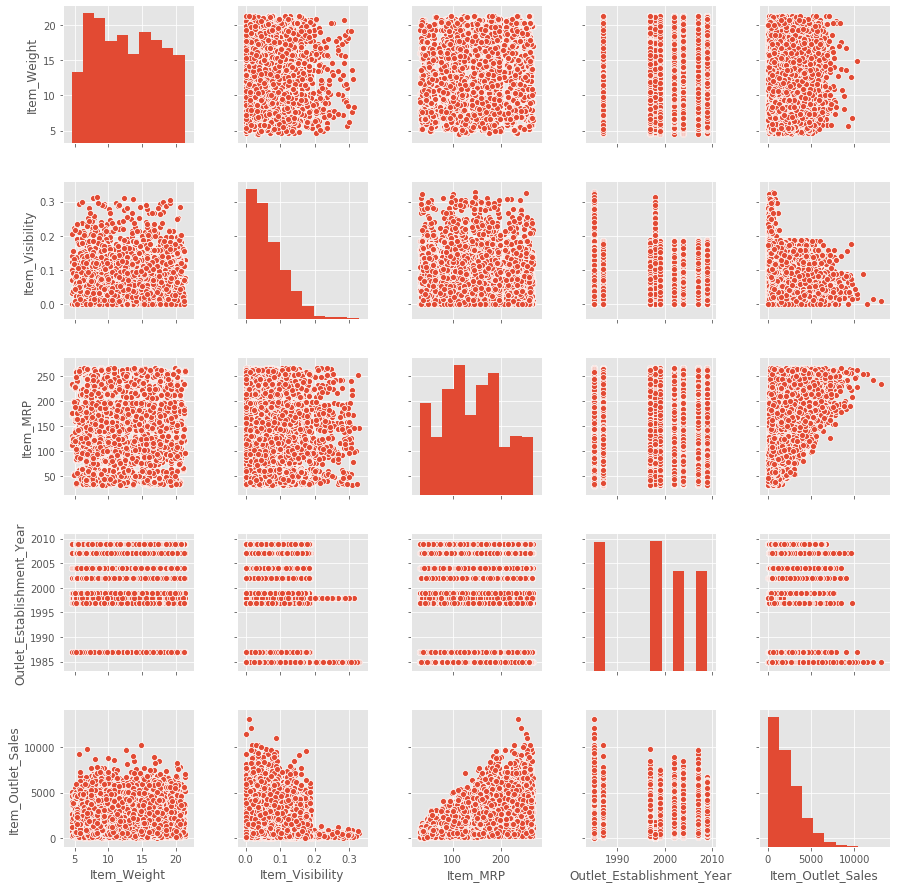

In [58]:
sns.pairplot(df1)

In [59]:
## No as such linear trend seems to be developed from the data provided

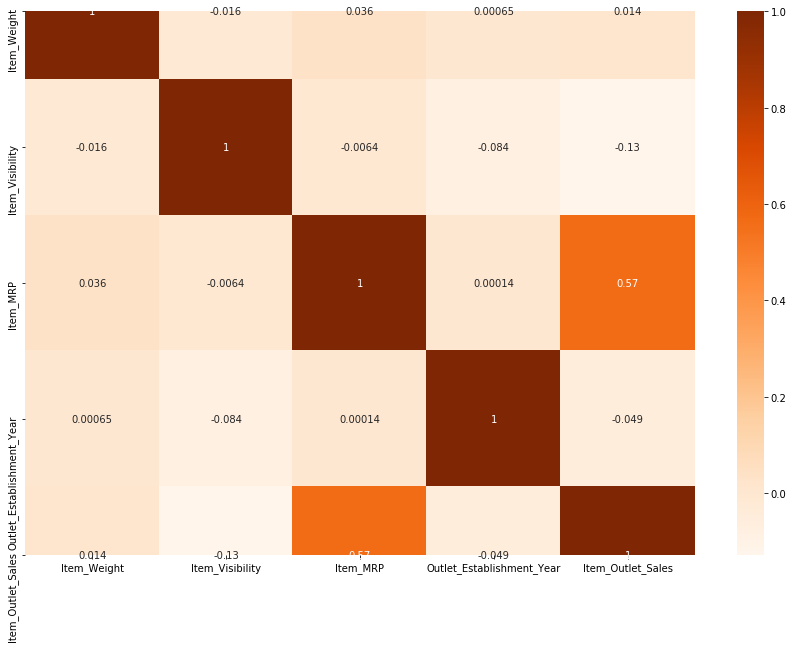

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot = True,cmap = 'Oranges')

In [21]:
x = df1.groupby('Item_Fat_Content')['Item_Outlet_Sales'].agg('mean').reset_index()

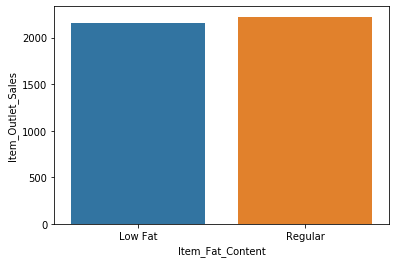

In [22]:
sns.barplot(x.Item_Fat_Content,x.Item_Outlet_Sales)
plt.show()

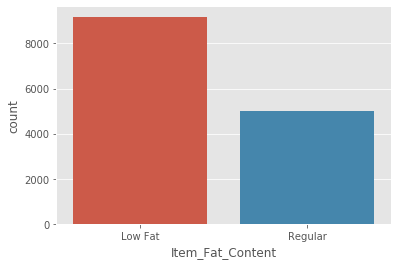

In [83]:
sns.countplot(df1.Item_Fat_Content)
plt.show()

In [23]:
x = df1.groupby('Item_Type')['Item_Outlet_Sales'].agg('count').reset_index()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

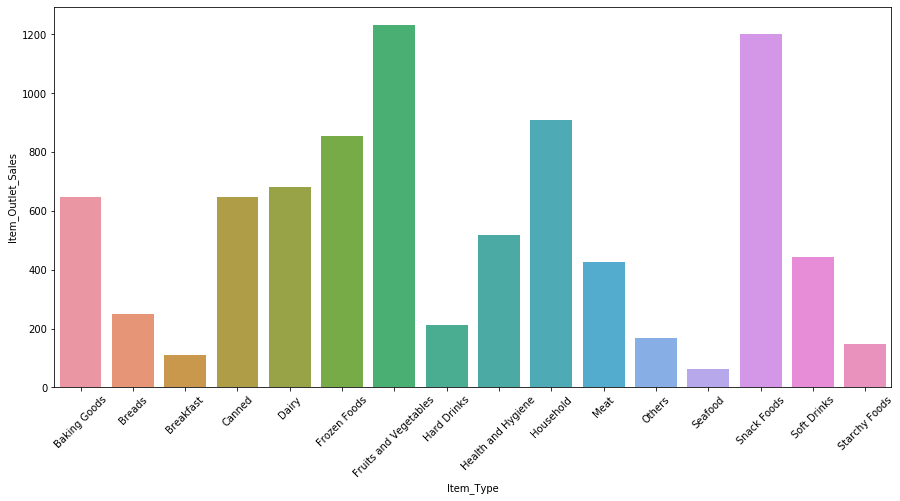

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(x.Item_Type,x.Item_Outlet_Sales)
plt.xticks(rotation = 45)

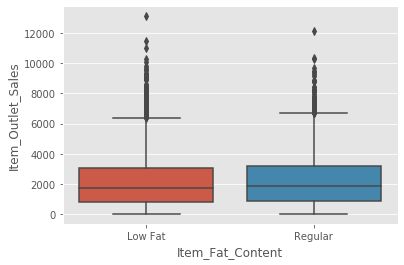

In [84]:
sns.boxplot(df1.Item_Fat_Content,df1.Item_Outlet_Sales)

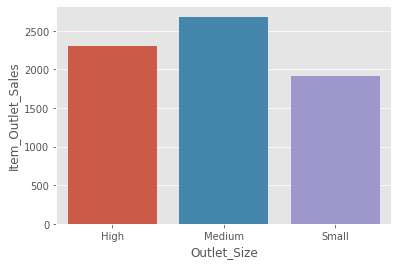

In [87]:
x = df1.groupby('Outlet_Size')['Item_Outlet_Sales'].agg('mean').reset_index()
sns.barplot(x.Outlet_Size,x.Item_Outlet_Sales)
plt.show()

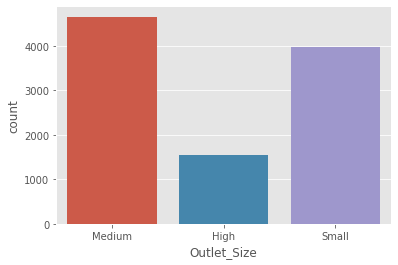

In [88]:
sns.countplot(df1.Outlet_Size)

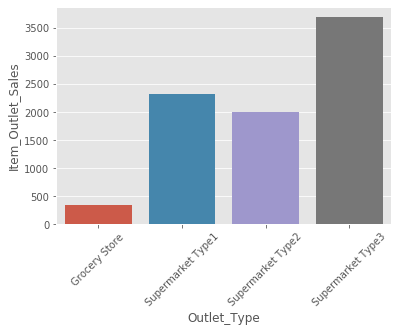

In [93]:
x = df1.groupby('Outlet_Type')['Item_Outlet_Sales'].agg('mean').reset_index()
sns.barplot(x.Outlet_Type,x.Item_Outlet_Sales)
plt.xticks(rotation = 45)
plt.show()

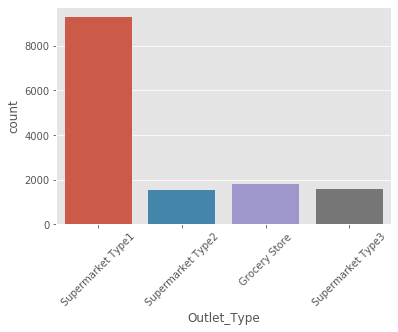

In [95]:
sns.countplot(df1.Outlet_Type)
plt.xticks(rotation = 45)
plt.show()

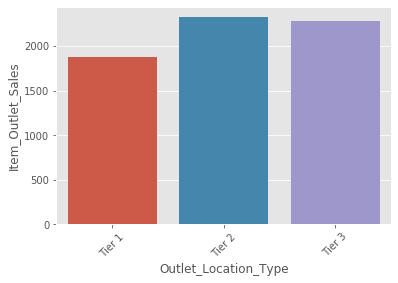

In [97]:
x = df1.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].agg('mean').reset_index()
sns.barplot(x.Outlet_Location_Type,x.Item_Outlet_Sales)
plt.xticks(rotation = 45)
plt.show()

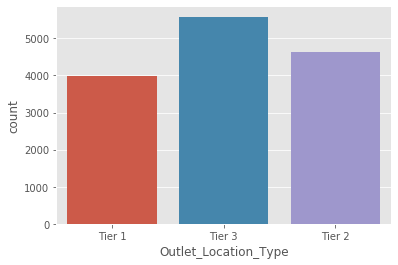

In [98]:
sns.countplot(df1.Outlet_Location_Type)

In [28]:
train = df1[df1.test.isnull()]
test = df1[df1.train.isnull()]

In [31]:
train['Item_Weight'] = train.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))
test['Item_Weight'] = test.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [32]:
train['Item_Weight'].replace(np.nan,12.15,inplace = True)

C:\Users\uphaa\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [33]:
test['Item_Weight'].replace(np.nan,10.5,inplace = True)

In [34]:
train['Item_Visibility'] = train.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x:x.replace(0,x.mean()))
test['Item_Visibility'] = test.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x:x.replace(0,x.mean()))


C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
train.Outlet_Size.replace(np.nan,'Medium',inplace = True)


In [37]:
test.Outlet_Size.replace(np.nan,'Medium',inplace = True)

C:\Users\uphaa\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


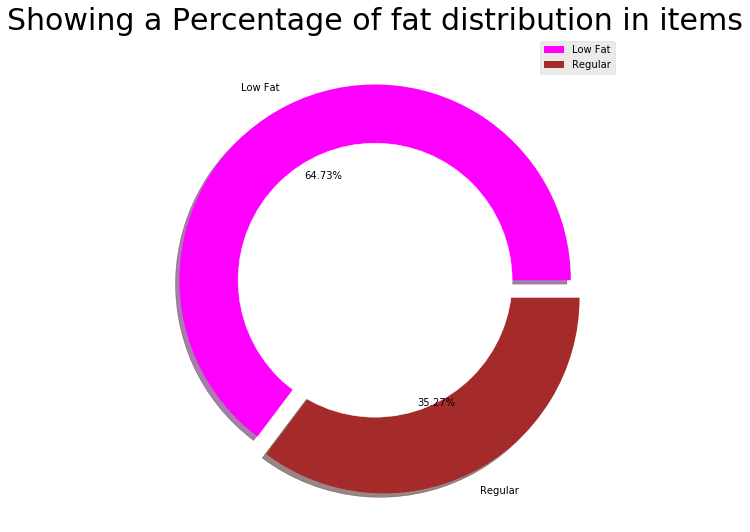

In [148]:
size = [5517,3006]
colors = ['magenta', 'brown']
labels = "Low Fat", "Regular"
explode = [0,0.1]
my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%',explode = explode)
plt.title('Showing a Percentage of fat distribution in items', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

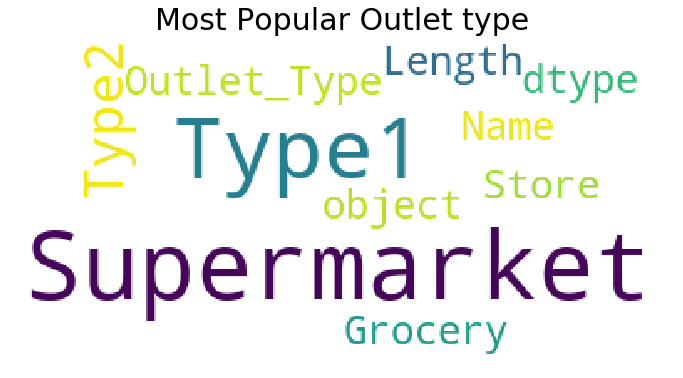

In [149]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

wordcloud = WordCloud(background_color = 'white', stopwords = stopword).generate(str(df1['Outlet_Type']))

plt.rcParams['figure.figsize'] = (12, 8)
#print(wordcloud)
plt.imshow(wordcloud)
plt.title('Most Popular Outlet type', fontsize = 30)
plt.axis('off')
plt.show()

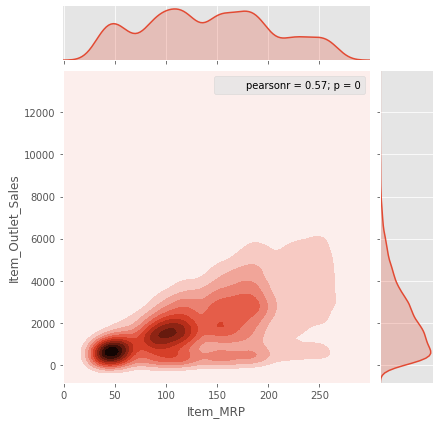

In [136]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data = train,kind = 'kde').annotate(stats.pearsonr)

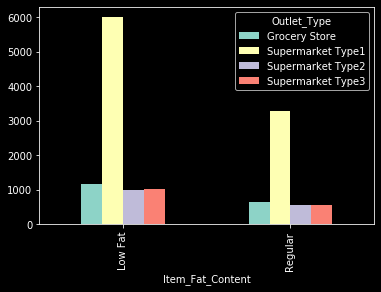

In [46]:
plt.style.use('dark_background')
pd.crosstab(df1.Item_Fat_Content,df1.Outlet_Type).plot(kind = 'bar')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Fat_Content,,,,
Low Fat,1165,6013,999,1008
Regular,640,3281,547,551


In [49]:
x = df1.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg('mean').reset_index()

In [54]:
y = x.sort_values('Item_Outlet_Sales',ascending = False).iloc[:3,]

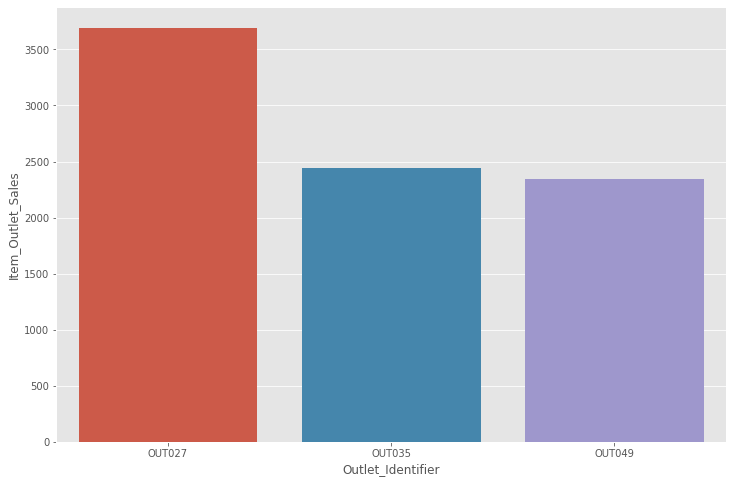

In [171]:
sns.barplot(y.Outlet_Identifier,y.Item_Outlet_Sales)

In [47]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
train                        5681
test                            0
dtype: int64

In [214]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [233]:
#soft-drink > DR
#Dairy > FD
#Meat > FD
#Fruits > FD
#Household > NC
#Baking Goods > FD
# Snacks > FD
# Frozen > FD
#Breakfast > FD
#Health/Hygiene > NC
# Hard drink > DR
# canned FD
# Breads > FD
# Starchy > FD
# others > NC
# Seafood > FD

## Broadly,FD,DR,NC are the 3 categories divided

In [60]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,train,test
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,NaN
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,NaN
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,NaN
3,FDX07,19.200,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,NaN
4,NCD19,8.930,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,train,NaN
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,train,NaN
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,train,NaN
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,train,NaN


In [61]:
lis = []
for x,y in train.iterrows():
    lis.append(y['Item_Identifier'][:2])
train['Ident'] = lis   

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [62]:
lis1 = []
for x,y in test.iterrows():
    lis1.append(y['Item_Identifier'][:2])
test['Ident'] = lis1  

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [63]:
lisq=[]
for x,y in train.iterrows():
    lisq.append(y.Outlet_Identifier[-3:])
train['Outlet_Ident'] = lisq

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [64]:
lisq1=[]
for x,y in test.iterrows():
    lisq1.append(y.Outlet_Identifier[-3:])
test['Outlet_Ident'] = lisq1

C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [67]:
train.head()
#item,outlet identifier ,train,test,identifire no need

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Ident,Outlet_Ident
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,049
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,018
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,049
3,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,FD,010
4,8.93,Low Fat,0.008082,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NC,013


In [66]:
train.drop(['Item_Identifier','Outlet_Identifier','train','test'],axis =1 ,inplace = True)

C:\Users\uphaa\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
test.drop(['Item_Identifier','Outlet_Identifier','train','test','Item_Outlet_Sales'],axis =1 ,inplace = True)

C:\Users\uphaa\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [302]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

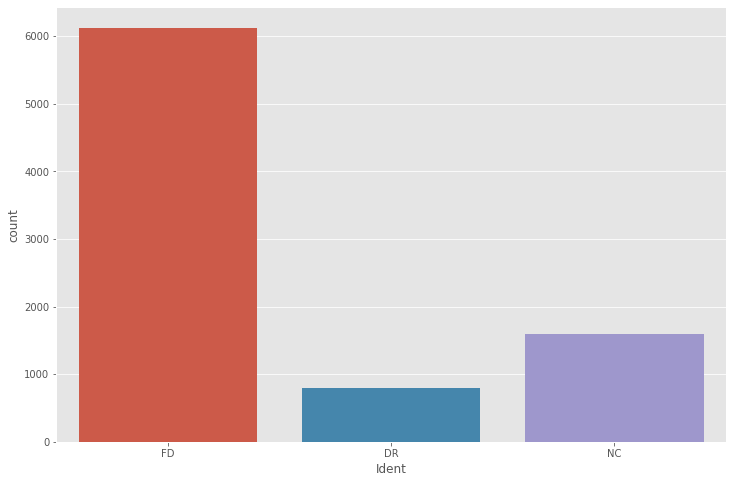

In [298]:
sns.countplot(train['Ident'])

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [81]:
train['Outlet_Ident'] = train['Outlet_Ident'].astype('int64')
test['Outlet_Ident'] = test['Outlet_Ident'].astype('int64')


C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\uphaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
train_scale = train[['Item_Weight','Item_MRP','Outlet_Establishment_Year','Outlet_Ident']]
mms = MinMaxScaler()

q = pd.DataFrame(mms.fit_transform(train_scale),columns = train_scale.columns)

In [86]:
test_scale = test[['Item_Weight','Item_MRP','Outlet_Establishment_Year','Outlet_Ident']]
mms = MinMaxScaler()

w = pd.DataFrame(mms.fit_transform(test_scale),columns = test_scale.columns)

In [88]:
train.drop(['Item_Weight','Item_MRP','Outlet_Establishment_Year','Outlet_Ident'],axis = 1,inplace =True)
test.drop(['Item_Weight','Item_MRP','Outlet_Establishment_Year','Outlet_Ident'],axis = 1,inplace =True)

C:\Users\uphaa\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [92]:
train_new = pd.concat([train,q],axis =1)
test_new = pd.concat([test,w],axis =1)

In [202]:
train_new.drop('Item_Type',axis=1,inplace =True)
test_new.drop('Item_Type',axis=1,inplace =True)

In [203]:
train_latest = pd.get_dummies(train_new,drop_first=True)
test_latest = pd.get_dummies(test_new,drop_first=True)

In [204]:
train_latest.shape

(8523, 16)

In [260]:
x= train.groupby('Outlet_Identifier')['Item_Outlet_Sales'].agg('mean').reset_index()

In [268]:
x.set_index('Outlet_Identifier',inplace = True)

In [288]:
lq =[]
for y in train.Outlet_Identifier:
    if y in x.index:
        lq.append(x.loc[y,'Item_Outlet_Sales'])
    else:
        continue
        
train['avg_sales'] = lq
train_latest['avg_sales'] = train['avg_sales']

In [296]:
lq1 =[]
for y in test.Outlet_Identifier:
    if y in x.index:
        lq1.append(x.loc[y,'Item_Outlet_Sales'])
    else:
        continue
        
test['avg_sales'] = lq1
test_latest['avg_sales'] = test['avg_sales']

In [329]:
train_latest['avg_sales1'] = (train_latest['avg_sales'] - train['avg_sales'].min())/(train['avg_sales'].max() - train['avg_sales'].min())

In [332]:
test_latest['avg_sales'] = (test_latest['avg_sales'] - test['avg_sales'].min())/(test['avg_sales'].max() - test['avg_sales'].min())

## Modeling

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split

In [335]:
X= train_latest.drop('Item_Outlet_Sales',1)
y = train_latest.Item_Outlet_Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3,test_size=0.3)

In [336]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)

In [337]:
linreg.score(X_test,y_test)

0.5756437904094764

In [338]:
np.sqrt(mean_squared_error(y_test,y_pred))

1111.840141977069

## pre-processing

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.feature_selection import RFE

In [303]:
params = [{'n_features_to_select': np.arange(1,15)}]
linreg = LinearRegression()
rfe = RFE(linreg)
grid_rfe = GridSearchCV(estimator=rfe,cv = 5,param_grid=params)

In [304]:
grid_rfe.fit(X_train,y_train)
y_pred = grid_rfe.predict(X_test)

In [305]:
grid_rfe.best_params_

{'n_features_to_select': 11}

In [306]:
np.sqrt(mean_squared_error(y_test,y_pred))

1111.7011536082077

In [307]:
grid_rfe.score(X_test,y_test)

0.5757498792052536

In [ ]:
solution = pd.DataFrame({'Item_Identifier':t.Item_Identifier,'Outlet_Identifier':t.Outlet_Identifier,'Item_Outlet_Sales':y_pred})
solution.to_csv('solution2.csv',index = False)

In [116]:
## Since negative prediction values therefore neglecting the model algo

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [118]:
scale = StandardScaler()
rfe = RFE(linreg,n_features_to_select=9)
pipeline = make_pipeline(scale,rfe)
pipeline.fit(X_train,y_train)   
y_pred = pipeline.predict(X_test)

In [119]:
pipeline.score(X_test,y_test)

0.5756849830012878

## Random preprocessing

In [434]:
# scale columns reqd, gridsearchCV , rfe laga ke model

In [452]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [450]:
from sklearn.compose import TransformedTargetRegressor

In [453]:
pipeline = Pipeline(steps=[('normalize', MinMaxScaler()), ('model', LinearRegression())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=MinMaxScaler())

In [454]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [455]:
model.score(X_test,y_test)

0.41174137472607353

## Decision Tree

In [120]:
from sklearn.tree import DecisionTreeRegressor

In [308]:
params = [{'max_depth':np.arange(1,50)}]
dt = DecisionTreeRegressor()
#rfe = RFE(dt)
search_dt = GridSearchCV(estimator = dt,param_grid=params,cv =5)

In [309]:
search_dt.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 

In [310]:
search_dt.best_params_

{'max_depth': 5}

In [403]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

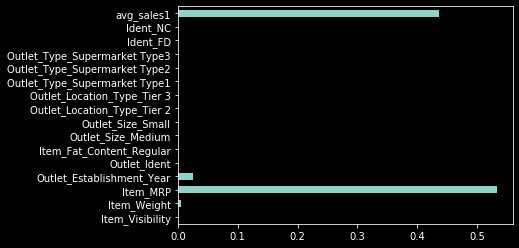

In [485]:
imp = pd.Series(dt.feature_importances_,index = X_train.columns)
imp.plot(kind ='barh')

In [312]:
np.sqrt(mean_squared_error(y_test,y_pred))

1085.0636625928075

In [313]:
dt.score(X_test,y_test)

0.5958372336314697

## Applying to real unseen data

In [137]:
dt.fit(X,y)
y_pred_test = dt.predict(test_latest)

In [139]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':y_pred_test})
solution.to_csv('solution_DT.csv',index = False)

## Random Forest

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [319]:
rfr = RandomForestRegressor(max_depth = 5)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)


C:\Users\uphaa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [482]:
rfr.feature_importances_

array([1.79515706e-03, 6.88369507e-03, 5.32795301e-01, 2.54707995e-02,
       2.73118665e-04, 9.48999707e-06, 1.12158708e-05, 0.00000000e+00,
       0.00000000e+00, 2.01683563e-06, 0.00000000e+00, 0.00000000e+00,
       3.54407976e-02, 0.00000000e+00, 1.45928116e-05, 3.97303815e-01])

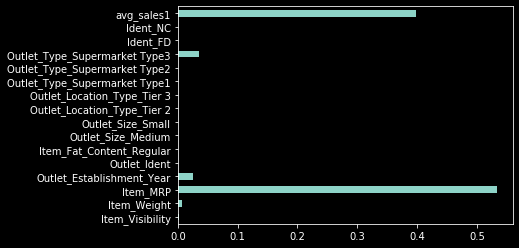

In [483]:
imp = pd.Series(rfr.feature_importances_,index = X_train.columns)
imp.plot(kind ='barh')

In [320]:
rfr.score(X_test,y_test)

0.6073460130956234

In [321]:
np.sqrt(mean_squared_error(y_test,y_pred))

1069.5031665777822

In [218]:
rfr.fit(X,y)
y_pred_test = rfr.predict(test_latest)

In [219]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':y_pred_test})
solution.to_csv('solution_RF1.csv',index =False)

## AdaBoost

In [161]:
from sklearn.ensemble import AdaBoostRegressor

In [177]:
dt_stump = DecisionTreeRegressor(max_depth = 5)
adr = AdaBoostRegressor(dt_stump,n_estimators=50)

In [178]:
adr.fit(X_train,y_train)
y_pred = adr.predict(X_test)

In [179]:
adr.score(X_test,y_test)

0.5236198195988209

In [180]:
np.sqrt(mean_squared_error(y_test,y_pred))

1178.0233837521246

## Gradient Boost

In [181]:
from sklearn.ensemble import GradientBoostingRegressor

In [339]:
gbr = GradientBoostingRegressor(max_depth =2)
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)

gbr.score(X_test,y_test)

0.6130676873671779

In [340]:
gbr = GradientBoostingRegressor(max_depth =2)
rfe = RFE(gbr,n_features_to_select=18)
rfe.fit(X_train,y_train)
y_pred = rfe.predict(X_test)

rfe.score(X_test,y_test)
np.sqrt(mean_squared_error(y_test,y_pred))

1061.682279296776

In [341]:
gbr.fit(X,y)
y_pred_test = gbr.predict(test_latest)

In [344]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':y_pred_test})
solution.to_csv('solution_GBR_new4.csv',index =False)

In [343]:
y_pred_test = np.abs(y_pred_test)

In [342]:
y_pred_test[y_pred_test < 0]

array([ -67.89027314, -120.1447449 ,   -7.60055463, -126.40547285,
        -66.5632129 , -111.8680542 , -106.93438648,  -41.90552933,
        -80.40224213,  -48.16625729,  -66.5632129 , -132.91913028,
       -113.19511444,  -47.98590038,  -66.92148276, -119.70877187,
        -62.27212036,  -66.5632129 ,  -43.10393255, -126.65840233,
       -120.1447449 ,  -38.67514277, -113.19511444, -120.1447449 ,
       -132.91913028,  -60.94506013,  -53.35554114,  -48.42187342,
        -48.41918676,  -55.11588775, -155.68552994,  -55.92982571,
        -75.73540826,  -46.83919705,  -60.04955547,  -61.37661571,
        -46.83919705,  -52.51521117,  -48.16625729, -122.31848952,
        -55.11588775,  -48.16625729, -128.82354912,  -51.51987713,
       -116.94025094, -135.81728387,  -75.48247878,  -73.45928878,
        -53.35285448,  -40.14518272,  -74.15541855,   -2.41395743,
        -53.35554114,  -64.09441239,  -59.86919857,  -56.01139241,
        -53.35285448,  -65.29228321,   -7.60055463,  -47.65313

In [345]:
from xgboost import XGBRegressor

In [351]:
xg = XGBRegressor(objective= 'reg:squarederror',n_estimators = 100)
xg.fit(X_train,y_train)
y_pred = xg.predict(X_test)
xg.score(X_test,y_test)

0.5426940503189328

In [352]:
np.sqrt(mean_squared_error(y_test,y_pred))

1154.1984715596402

In [353]:
from sklearn.decomposition import PCA

In [371]:
pca =PCA(n_components = 4,copy = True)
pca.fit(X_train,y_train)
q = pca.fit_transform(X_train)

In [375]:
pca =PCA(n_components = 4,copy = True)

q1 = pca.fit_transform(X_test)

In [376]:
gbr = GradientBoostingRegressor(max_depth =5)
gbr.fit(q,y_train)
y_pred = gbr.predict(q1)

gbr.score(q1,y_test)

-2.8179824233050415

In [378]:
X= train_latest.drop('Item_Outlet_Sales',1)
y = train_latest.Item_Outlet_Sales

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3,test_size=0.3)

In [379]:
from catboost import CatBoostRegressor

In [398]:
cat = CatBoostRegressor(learning_rate=0.06,n_estimators=100,reg_lambda=28,max_depth=4,colsample_bylevel=0.8)
cat.fit(X_train,y_train)
y_pred = cat.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

0:	learn: 1655.3756627	total: 5.45ms	remaining: 540ms
1:	learn: 1611.1683728	total: 9.8ms	remaining: 480ms
2:	learn: 1572.0819629	total: 14.7ms	remaining: 474ms
3:	learn: 1536.4968102	total: 21.5ms	remaining: 516ms
4:	learn: 1499.0773069	total: 27.8ms	remaining: 528ms
5:	learn: 1465.6803255	total: 33.8ms	remaining: 529ms
6:	learn: 1434.5330333	total: 39.4ms	remaining: 524ms
7:	learn: 1404.7381135	total: 44.3ms	remaining: 509ms
8:	learn: 1377.6554211	total: 50.2ms	remaining: 507ms
9:	learn: 1352.1188287	total: 55.2ms	remaining: 497ms
10:	learn: 1328.8434217	total: 65.2ms	remaining: 527ms
11:	learn: 1307.3793865	total: 71ms	remaining: 521ms
12:	learn: 1288.0087611	total: 78.2ms	remaining: 524ms
13:	learn: 1269.8698013	total: 83ms	remaining: 510ms
14:	learn: 1253.6618567	total: 90.6ms	remaining: 513ms
15:	learn: 1241.6617801	total: 95.5ms	remaining: 501ms
16:	learn: 1227.8266438	total: 100ms	remaining: 490ms
17:	learn: 1216.7381849	total: 116ms	remaining: 529ms
18:	learn: 1204.0548218	tot

1056.903487421347

In [399]:
cat.fit(X,y)
y_pred_test = cat.predict(test_latest)

0:	learn: 1655.1398119	total: 6.7ms	remaining: 663ms
1:	learn: 1607.6999633	total: 10.9ms	remaining: 536ms
2:	learn: 1567.8552366	total: 15.8ms	remaining: 509ms
3:	learn: 1530.4096546	total: 32.9ms	remaining: 789ms
4:	learn: 1495.7483959	total: 43.9ms	remaining: 834ms
5:	learn: 1461.3495630	total: 49ms	remaining: 767ms
6:	learn: 1429.3813332	total: 53.3ms	remaining: 708ms
7:	learn: 1404.1002667	total: 59.9ms	remaining: 689ms
8:	learn: 1375.3248858	total: 64ms	remaining: 647ms
9:	learn: 1349.1560652	total: 82.9ms	remaining: 746ms
10:	learn: 1325.9118579	total: 88.7ms	remaining: 718ms
11:	learn: 1304.0093485	total: 102ms	remaining: 748ms
12:	learn: 1283.7059628	total: 117ms	remaining: 782ms
13:	learn: 1268.0394659	total: 129ms	remaining: 792ms
14:	learn: 1250.9486232	total: 133ms	remaining: 751ms
15:	learn: 1237.8416582	total: 136ms	remaining: 715ms
16:	learn: 1223.4263340	total: 151ms	remaining: 735ms
17:	learn: 1212.6978669	total: 154ms	remaining: 700ms
18:	learn: 1200.1091708	total: 1

In [396]:
solution = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,'Item_Outlet_Sales':y_pred_test})
solution.to_csv('solution_cat.csv',index =False)

In [397]:
y_pred_test[y_pred_test < 0]

array([], dtype=float64)

In [400]:
np.sqrt(mean_squared_error(y_test,y_pred))

1056.903487421347

In [401]:
cat.score(X_test,y_test)

0.6251096287526771